### Importación de datos



In [43]:
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import numpy as np
import random

In [178]:
# Definiendo estructuras de datos

nombre_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"] # Creaciónde lista de nombres de tiendas para realizar la gráfica
list_lista_precios = [] # Creación de lista de listas de precios totales
list_lista_categoria = [] #Creación de la lista de listas decategorias de productos
list_lista_calificacion = [] #Lista de listas de calificaciones de usuarios por tienda
list_lista_productos = [] #Lista de los prodcutos vendidos por tienda
list_lista_costo = [] #Lista que contiene los costos de envio por tienda

In [5]:


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [ ]:
tienda2.head()

In [ ]:
tienda3.head()

In [ ]:
tienda4.head()

## 1. Análisis de facturación



In [ ]:

lista_tiendas = [tienda1, tienda2, tienda3, tienda4] #Lista con los nombres de las varibles que contienen la ruta de los archivos

In [146]:
col_precio = 'Precio'

#Extraemos los valores de la columa precios de cada uno de los archivos y las almacenamos en una lista de listas
for tienda in lista_tiendas:
    lista_precio = tienda[col_precio].tolist()
    list_lista_precios.append(lista_precio)
    

In [147]:
#Sumamos los valores de todas laa columnas y las agupamosen un nueva lista
precios_totales_tienda = [sum(lista_tienda) for lista_tienda in list_lista_precios]

In [148]:
dict_precios_tiendas = dict(zip(nombre_tiendas, precios_totales_tienda))
print(dict_precios_tiendas)

{'Tienda 1': 1150880400.0, 'Tienda 2': 1116343500.0, 'Tienda 3': 1098019600.0, 'Tienda 4': 1038375700.0}


In [150]:
# Creacion de grafico de barras con el total de Ingresos por tienda:
def mostrar_grafico_precios_tiendas(dict_precios_tiendas):
    tiendas = list(dict_precios_tiendas.keys())
    precios = list(dict_precios_tiendas.values())

    plt.figure(figsize=(10, 6))
    barras = plt.bar(tiendas, precios, color='skyblue', edgecolor='black')

    # Mostrar los valores sobre cada barra
    for barra, valor in zip(barras, precios):
        plt.text(barra.get_x() + barra.get_width() / 2, 
                 barra.get_height() / 2,  # o barra.get_height() + 10000000 para encima
                 f'{valor:,.0f}', 
                 ha='center', va='center', fontsize=10, color='black', rotation=90)

    plt.title('Suma de Ingresos Totales por Tienda', fontsize=16, fontweight='bold')
    plt.xlabel('Tienda', fontsize=12)
    plt.ylabel('Ingresos', fontsize=12)
    plt.tight_layout()
    plt.show()

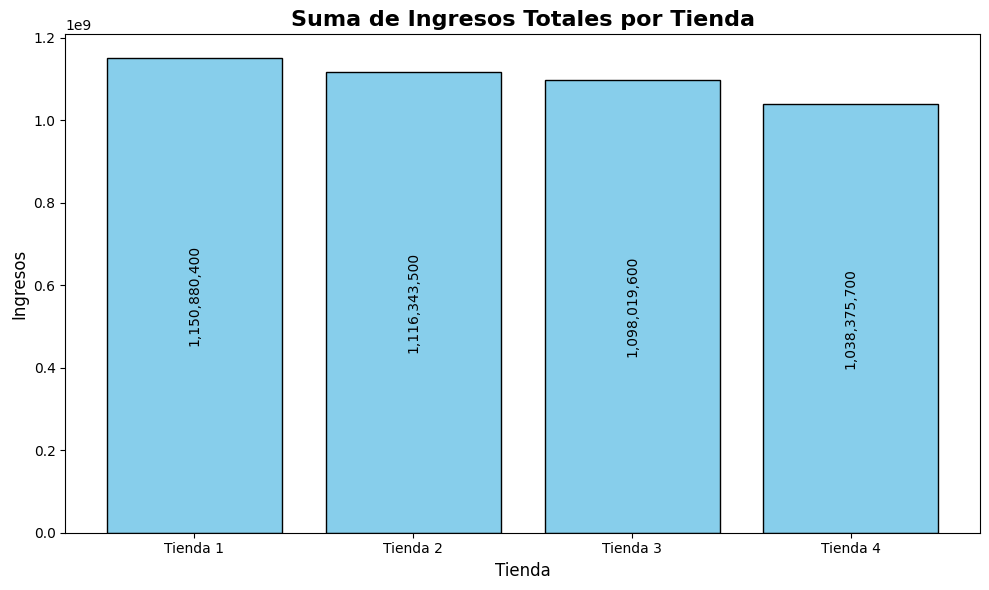

In [151]:
mostrar_grafico_precios_tiendas(dict_precios_tiendas)

# 2. Ventas por categoría

In [153]:
cat = 'Categoría del Producto' #Variable que gusrda el nombre de la columna categoria

#Extraemos los nombres de la columa Categoria de cada uno de los archivos y las almacenamos en una lista de listas
for tienda in lista_tiendas:
    lista_cate = tienda[cat].tolist()
    list_lista_categoria.append(lista_cate)

In [154]:
#Creación de un diccionario donde cada tienda muetra la cantidad vendida por cada categoria

conteo_categoria = {}

for tienda, n_ventas in zip(nombre_tiendas, list_lista_categoria):
    conteo_categoria[tienda] = dict(Counter(n_ventas))
    

In [155]:
# Creando uan función para encapsulat la ejecución de un grafico por cada tineda

def graficar_tienda(nom_tienda):
    if nom_tienda not in conteo_categoria:
        print(f"La tienda {nom_tienda} no se ha encontrado")
        return
    
    datos = conteo_categoria[nom_tienda]
    categorias_tienda = list(datos.keys())
    cantidades_categorias = list(datos.values())
    
    cmap = plt.get_cmap('Pastel1')
    colores = [cmap(i / len(categorias_tienda)) for i in range(len(categorias_tienda))]
    

    plt.figure(figsize=(7, 7))
    plt.pie(
        cantidades_categorias,
        labels=categorias_tienda,
        autopct='%1.1f%%',
        startangle=90,
        colors=colores,
        wedgeprops={'edgecolor': 'black'}
    )
    plt.title(f'Participación por Categoría - {nom_tienda}', fontsize=14, fontweight='bold')
    plt.axis('equal')  # Asegura que el gráfico sea circular
    plt.tight_layout()
    plt.show()

In [156]:
def graficar_categorias_por_tienda():
    df = pd.DataFrame(conteo_categoria).fillna(0).astype(int)

    categorias = df.index
    x = np.arange(len(categorias))
    ancho = 0.2

    fig, ax = plt.subplots(figsize = (20, 6))

    for i, tienda in enumerate(nombre_tiendas):
        ax.bar(x + i * ancho, df[tienda], width = ancho, label = tienda)
        
    # Configurar etiquetas y títulos
    ax.set_xlabel('Categoría de producto')
    ax.set_ylabel('Cantidad de ventas')
    ax.set_title('Total de Ventas por Categoría en totas las Tiendas', fontsize = 16, fontweight = 'bold')
    ax.set_xticks(x + ancho * (len(nombre_tiendas) - 1) / 2)
    ax.set_xticklabels(categorias)
    ax.legend()

    plt.tight_layout
    plt.show

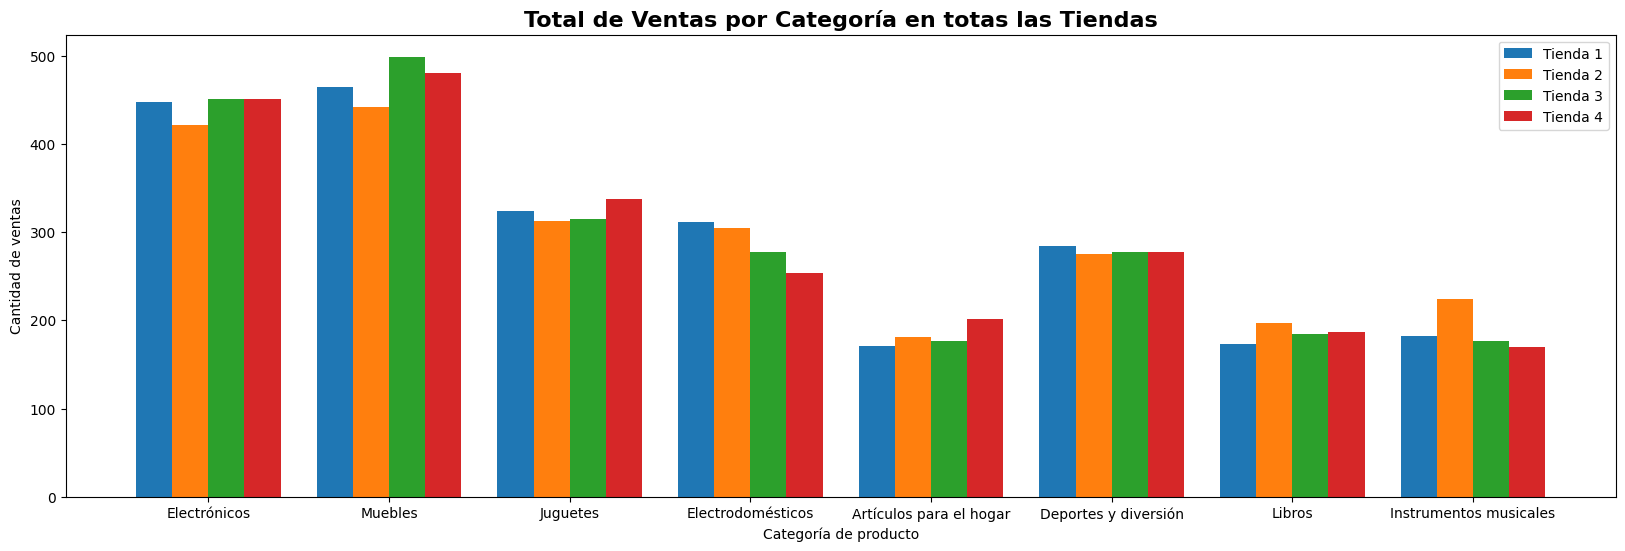

In [157]:
graficar_categorias_por_tienda()

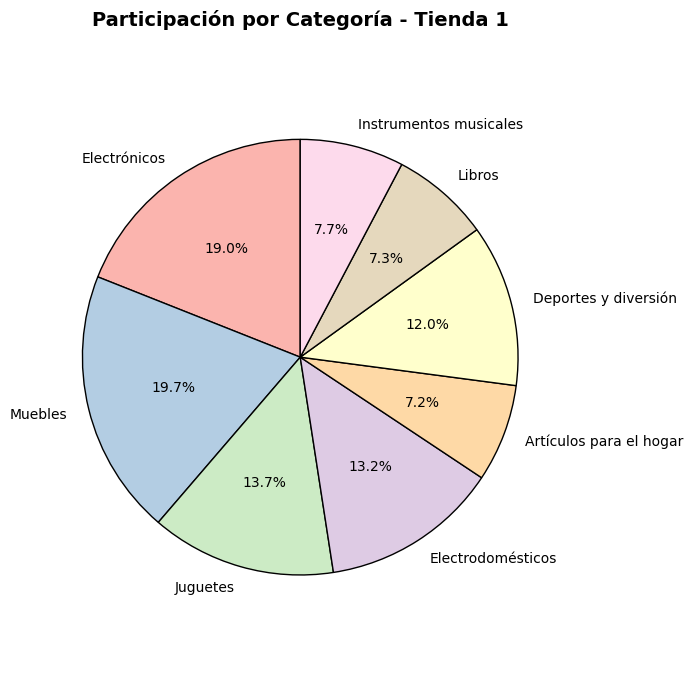

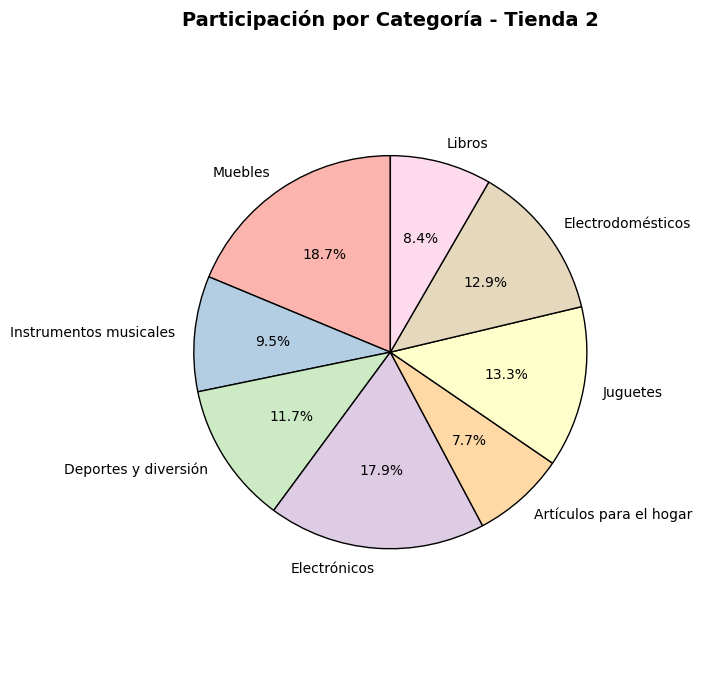

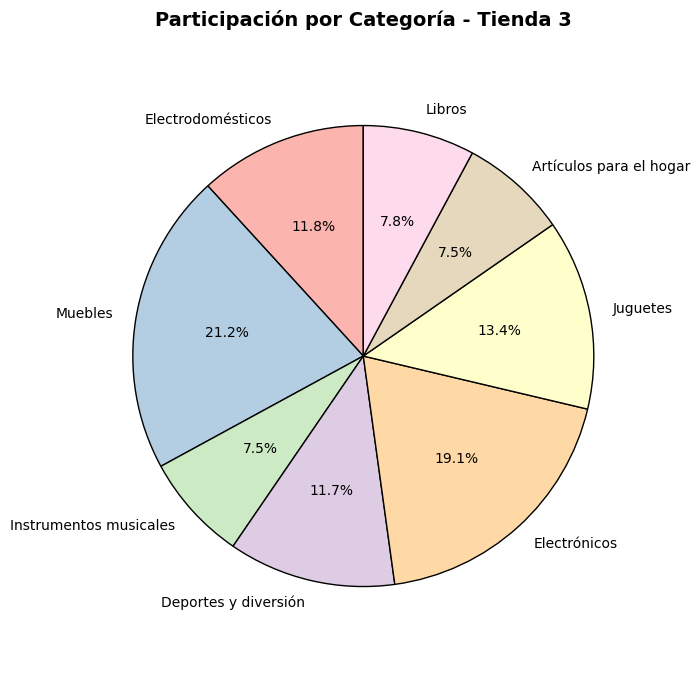

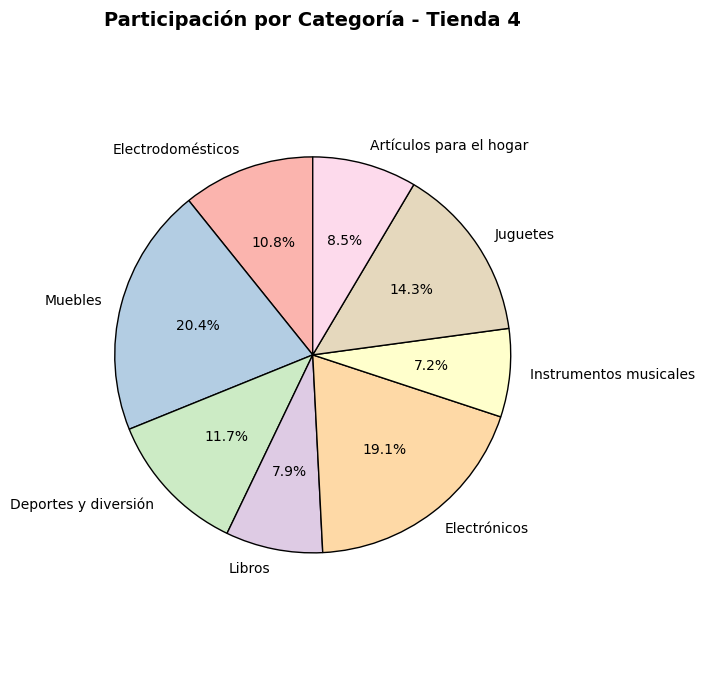

In [158]:
graficar_tienda('Tienda 1')
graficar_tienda('Tienda 2')
graficar_tienda('Tienda 3')
graficar_tienda('Tienda 4')

# 3. Calificación promedio de la tienda


In [160]:
col_calificacion = 'Calificación'

#Extraemos los valores de la columa Calificación de cada uno de los archivos y las almacenamos en una lista de listas
for tienda in lista_tiendas:
    lista_calificacion = tienda[col_calificacion].tolist()
    list_lista_calificacion.append(lista_calificacion)
    

In [161]:
#Hallamos el promedio de los valodes de cada sub lista y las agupamos en un nueva lista
promedio_calificaciones = [round(sum(lista_calificacion) / len(lista_calificacion),2) for lista_calificacion in list_lista_calificacion]
promedio_calificaciones

[3.98, 4.04, 4.05, 4.0]

In [162]:
def grafico_calificaciones():
    #Generamos el grafico de barra de los premdis de calificaciones por tienda
    barras_promedio = plt.bar(
                x = nombre_tiendas, 
                height = promedio_calificaciones,
                edgecolor='black',
                color= 'gold'
                
            )
    plt.title('Promedio de calificaciones de usuarios por Tienda', fontsize = 16, fontweight = 'bold')
    plt.xlabel('Tienda', fontsize=10)
    plt.ylabel('Promedio', fontsize=10)

    for i, barra2 in enumerate(barras_promedio):
        altura_2 = barra2.get_height()
        plt.text(barra2.get_x() + barra2.get_width() / 2, altura_2, f'{altura_2: .2f}', ha='center', va='bottom', fontsize=8)

    plt.tight_layout
    plt.show()

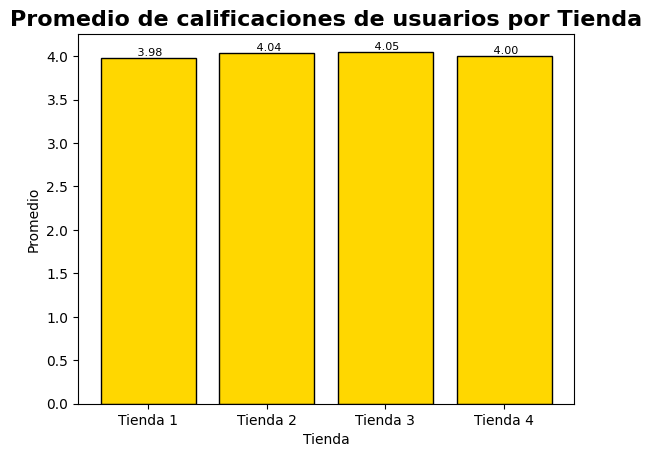

In [163]:
grafico_calificaciones()

In [120]:
def mostrar_tienda_mayor_calificacion():
    #Código para imprimir por pantalla la tienda con mayor calificación
    pares_tiendas_calificaciones = list(zip(nombre_tiendas, promedio_calificaciones))
    calificacion_maxima = max(promedio_calificaciones)
    tienda_con_mayor_calificacion = ""
    for tienda, calificacion in pares_tiendas_calificaciones:
        if calificacion == calificacion_maxima:
            tienda_con_mayor_calificacion = tienda
            break # Salimos del bucle al encontrar el valor máximo

    print(f"La tienda con la mayor calificación es: {tienda_con_mayor_calificacion}")

In [164]:
mostrar_tienda_mayor_calificacion()

La tienda con la mayor calificación es: Tienda 3


# 4. Productos más y menos vendidos

In [173]:
prod = 'Producto' #Variable que gusrda el nombre de la columna Prodcuto

#Extraemos los nombres de la columa Producto de cada uno de los archivos y las almacenamos en una lista de listas
for tienda in lista_tiendas:
    lista_prod = tienda[prod].tolist()
    list_lista_productos.append(lista_prod)
    

In [167]:
# Creamos una lista de listas de productos por tienda con conteo por tiendas

cantidad_productos_tienda = [{producto: conteo for producto, conteo in Counter(ventas).items()} for ventas in list_lista_productos]

In [168]:
# Creamos un diccionario para visulizar el conteo de cada producto relacionado a su nombre de tienda

dict_tienda_productos = dict(zip(nombre_tiendas, cantidad_productos_tienda))


In [169]:
# visualizamos el producto más vendido y menos vendido de cada tienda
def mostras_productos_vendidos():
    for tienda, conteo in dict_tienda_productos.items():
        # Obtener producto más vendido
        producto_mas_vendido = max(conteo.items(), key=lambda x: x[1])
        
        # Obtener producto menos vendido
        producto_menos_vendido = min(conteo.items(), key=lambda x: x[1])
        
        print(f"\n{tienda}:")
        print(f"Más vendido:   {producto_mas_vendido[0]} (vendido {producto_mas_vendido[1]} veces)")
        print(f"Menos vendido: {producto_menos_vendido[0]} (vendido {producto_menos_vendido[1]} veces)")

In [170]:
mostras_productos_vendidos()


Tienda 1:
Más vendido:   Microondas (vendido 60 veces)
Menos vendido: Auriculares con micrófono (vendido 33 veces)

Tienda 2:
Más vendido:   Iniciando en programación (vendido 65 veces)
Menos vendido: Juego de mesa (vendido 32 veces)

Tienda 3:
Más vendido:   Kit de bancas (vendido 57 veces)
Menos vendido: Bloques de construcción (vendido 35 veces)

Tienda 4:
Más vendido:   Cama box (vendido 62 veces)
Menos vendido: Guitarra eléctrica (vendido 33 veces)


In [171]:
def graficar_productos_vendidos():
    # Extraemos los datos del diccionario de productos vendidos en varias listas
    nom_tiendas = []
    produ_max = []
    cant_max = []

    produ_min = []
    cant_min = []

    for tienda, conteo in dict_tienda_productos.items():
        mas_vendido = max(conteo.items(), key=lambda x: x[1])
        menos_vendido = min(conteo.items(), key=lambda x: x[1])

        nom_tiendas.append(tienda)
        produ_max.append(mas_vendido[0])
        cant_max.append(mas_vendido[1])

        produ_min.append(menos_vendido[0])
        cant_min.append(menos_vendido[1])

    # Crear gráfico de barras agrupadas
    x = np.arange(len(nom_tiendas))
    ancho = 0.35

    fig, ax = plt.subplots(figsize=(12, 6))
    b1 = ax.bar(x - ancho/2, cant_max, width=ancho, label='Más vendido', color='green')
    b2 = ax.bar(x + ancho/2, cant_min, width=ancho, label='Menos vendido', color='red')

    # Etiquetas y título
    ax.set_ylabel('Cantidad de ventas')
    ax.set_title('Producto más y menos vendido por tienda')
    ax.set_xticks(x)
    ax.set_xticklabels(nom_tiendas)
    ax.legend()

    # Mostrar nombres dentro de las barras
    for i in range(len(nom_tiendas)):
        ax.text(x[i] - ancho/2, cant_max[i]/2, produ_max[i],
                ha='center', va='center', color='white', fontsize=12, fontweight = 'bold', rotation=90)
        ax.text(x[i] + ancho/2, cant_min[i]/2, produ_min[i],
                ha='center', va='center', color='white', fontsize=12,fontweight = 'bold', rotation=90)

    plt.tight_layout()
    plt.show()

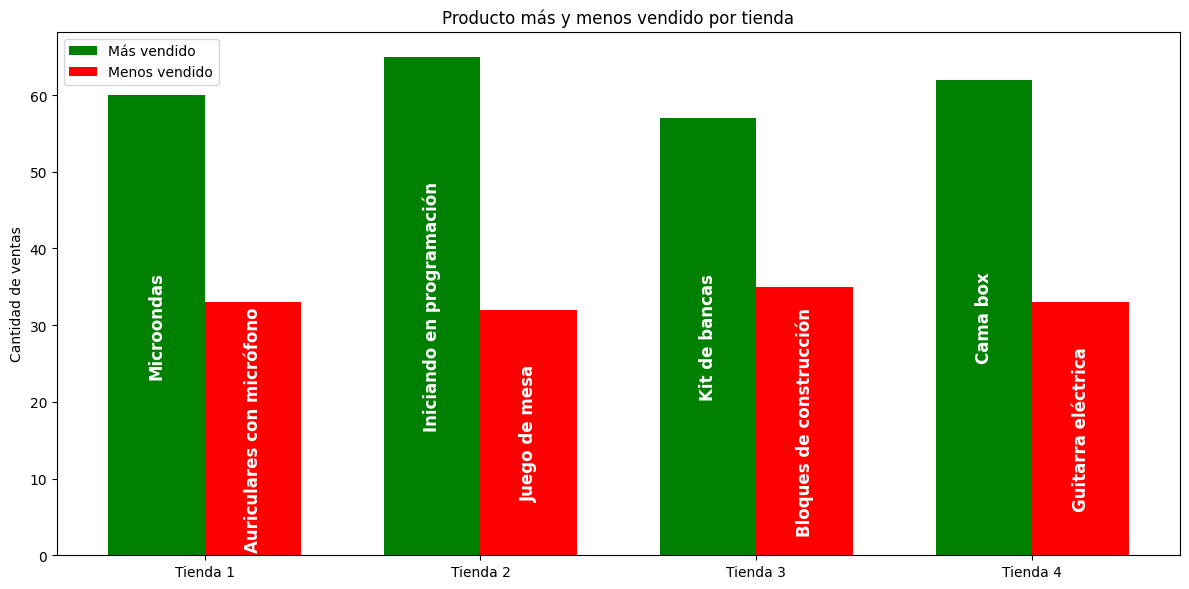

In [172]:
graficar_productos_vendidos()

# 5. Costo de envío promedio por tienda

In [ ]:
col_costo = 'Costo de envío'

#Extraemos los valores de la columa Costos de envio de cada uno de los archivos y las almacenamos en una lista de listas
for tienda in lista_tiendas:
    lista_costos = tienda[col_costo].tolist()
    list_lista_costo.append(lista_costos)


In [180]:
#Hallamos el promedio de los valodes de cada sub lista y las agupamos en un nueva lista
promedio_costos = [round(sum(lista_costos) / len(lista_costos),2) for lista_costos in list_lista_costo]
promedio_costos

[26018.61, 25216.24, 24805.68, 23459.46]

In [182]:
dict_costos_tienda = dict(zip(nombre_tiendas, promedio_costos))
dict_costos_tienda

{'Tienda 1': 26018.61,
 'Tienda 2': 25216.24,
 'Tienda 3': 24805.68,
 'Tienda 4': 23459.46}

In [188]:
def graficar_costo_tienda():
    # Convertir nombres de tiendas a índices numéricos
    x = np.arange(len(nombre_tiendas))

    # Crear gráfico
    plt.figure(figsize=(8, 5))
    plt.plot(x, promedio_costos, marker='o', color='blue', linestyle='-', linewidth=2)

    # Etiquetas y título
    plt.title('Promedio de Costos por Tienda', fontsize=14, fontweight='bold')
    plt.xlabel('Tiendas', fontsize=12)
    plt.ylabel('Promedio de Costos', fontsize=12)

    # Colocar nombres en el eje X
    plt.xticks(ticks=x, labels=nombre_tiendas)

    # Mostrar valores sobre los puntos
    for i, costo in enumerate(promedio_costos):
        plt.text(i, costo + 200, f'{costo:.2f}', ha='center', fontsize=10)

    # Mejoras visuales
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


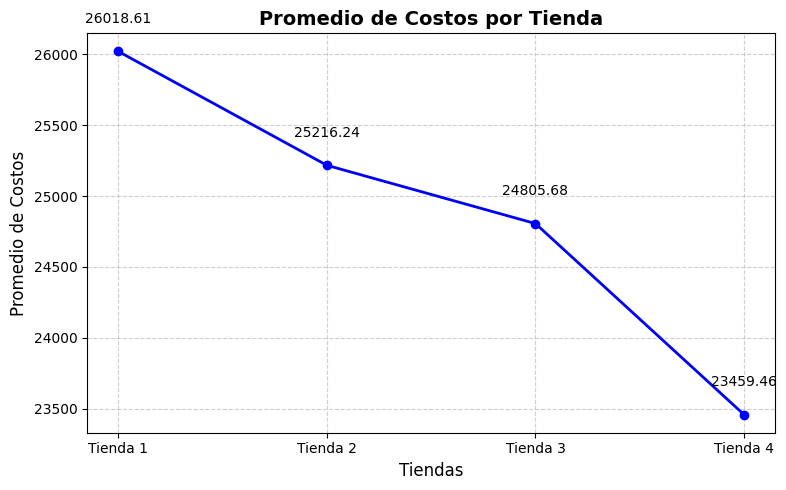

In [190]:
graficar_costo_tienda()

## Gerenado los gráficos


## Visualización de resultados